In [14]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [15]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, add_subplotlabels, set_boundaries
                              # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
tutorial_name = path_in_folder.split("/")[2]
path_figures = "/docs/sphinx/source/tutorials/figures/" + tutorial_name + "/"
print("tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

tutorial name: mdanalysis
figures will be saved in /docs/sphinx/source/tutorials/figures/mdanalysis/


In [16]:
distribution_initiale = np.loadtxt("starting_bond_distribution.dat")
bond_length, distribution_initiale = distribution_initiale.T

In [17]:
distribution_finale = np.loadtxt("ending_bond_distribution.dat")
bond_length, distribution_finale = distribution_finale.T

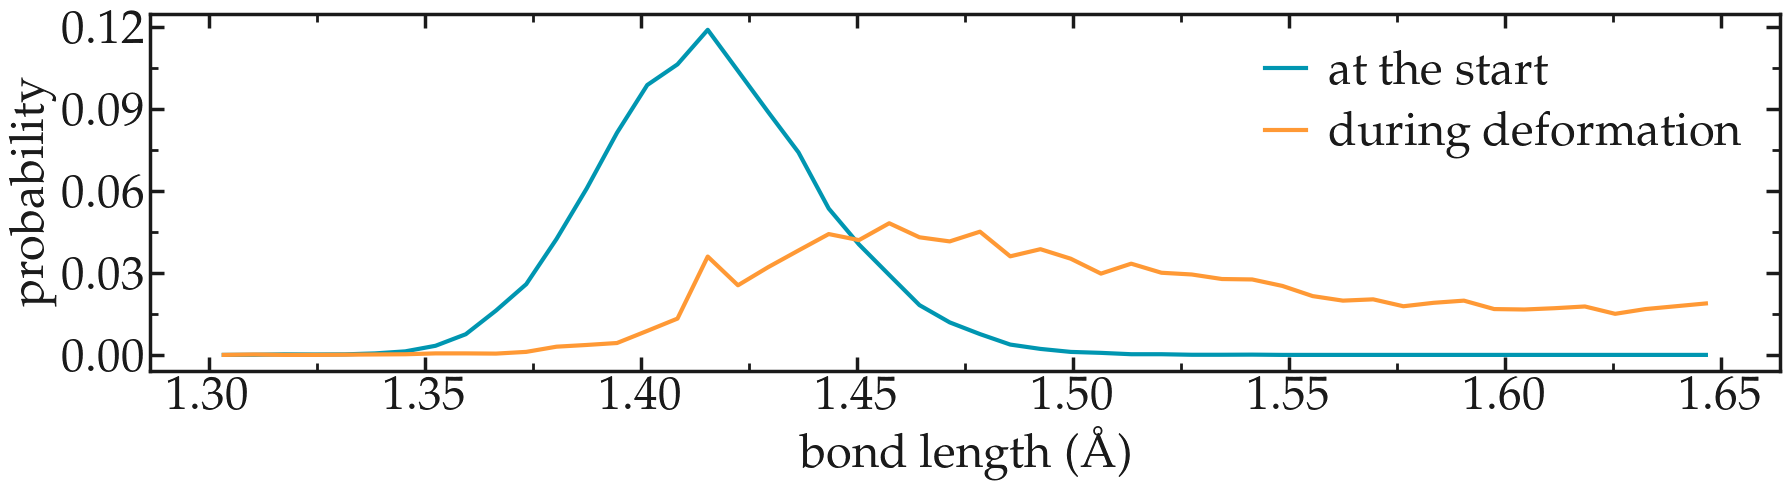

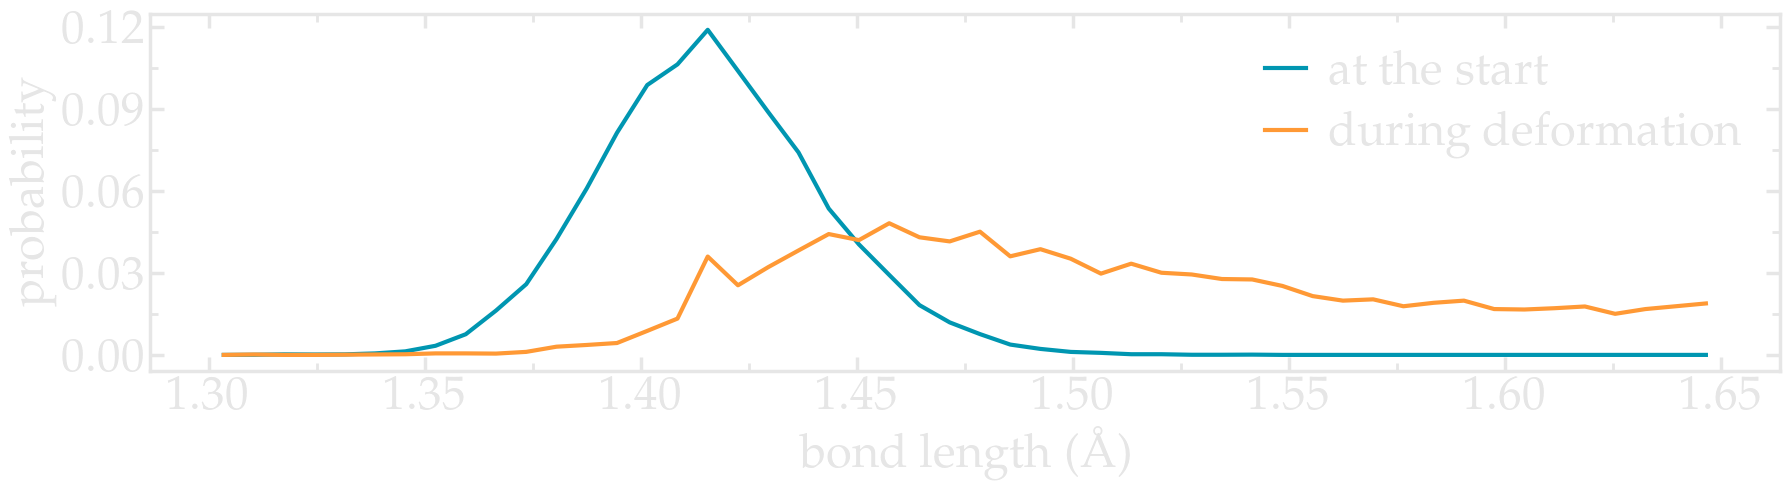

In [18]:
filename = "bond-distribution"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,5))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(bond_length, distribution_initiale/np.sum(distribution_initiale), color=colors["myblue"], linewidth=3, label="at the start")
    ax[-1].plot(bond_length, distribution_finale/np.sum(distribution_finale), color=colors["myorange"], linewidth=3, label="during deformation")
    complete_panel(ax[-1], r'bond length (\AA)', r'probability', legend=True, axis_color=mygray)
    set_boundaries(plt, y_ticks=np.arange(0, 0.13, 0.03))
    save_figure(fig, mode, git_path, path_figures, filename)